In [30]:
import video_loader

video_file = "s3://synthesia-rnd-eun1-dataops-prd-datalake/processed/lvm_video_dataset_ingest/finetuning_video_datasets/dit/stock_personal_avatar_01_2025/GeorginaKJ_snapshot_2_v2/version=0/synthesia-rnd-videotranscoder/transcoded/synthesia_id-25cea141-5557-6f5b-c309-b97bb6731958.webm"

video = video_loader.Decoder(str(video_file))
first_frame = video.load_frame(0)

✓ First frame saved as 'first_frame.jpg' and 'first_frame.png'
Image dimensions: (1080, 1920, 3)


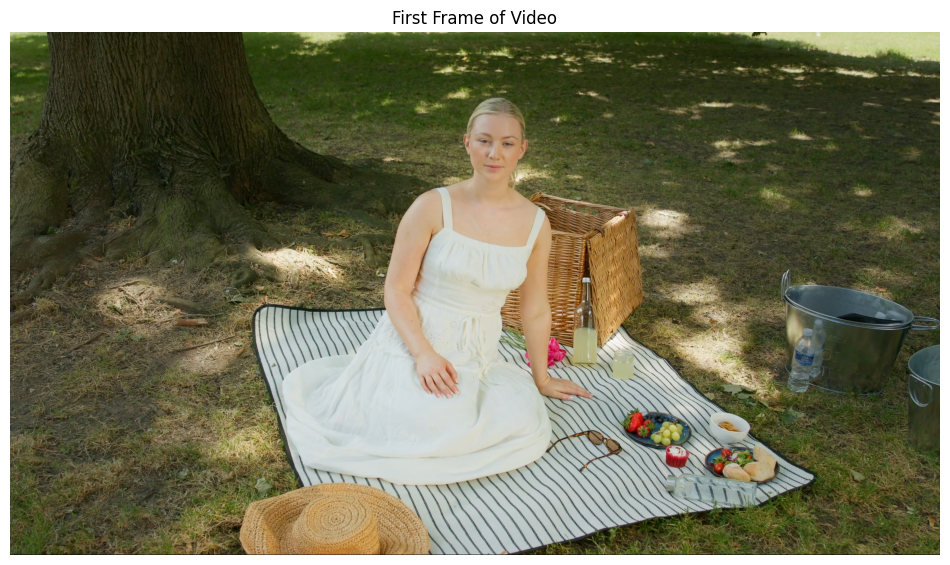

In [31]:
import numpy as np
from PIL import Image

# Convert the image_scaling.Image to numpy array
frame_array = first_frame.rgb().numpy()
frame_array = (255 * np.clip(frame_array, 0, 1)).astype(np.uint8)

# Convert from CHW (channels, height, width) to HWC (height, width, channels) format
frame_hwc = frame_array.transpose(1, 2, 0)

# Save using PIL
pil_image = Image.fromarray(frame_hwc)
pil_image.save("ada_2_v2.png")  # PNG for lossless quality

print("✓ First frame saved as 'first_frame.jpg' and 'first_frame.png'")
print(f"Image dimensions: {frame_hwc.shape}")

# Optional: Display the image
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.imshow(frame_hwc)
plt.axis("off")
plt.title("First Frame of Video")
plt.show()